# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## load dataset here
df = pd.read_csv("/content/drive/My Drive/ML/Data/final_project/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)


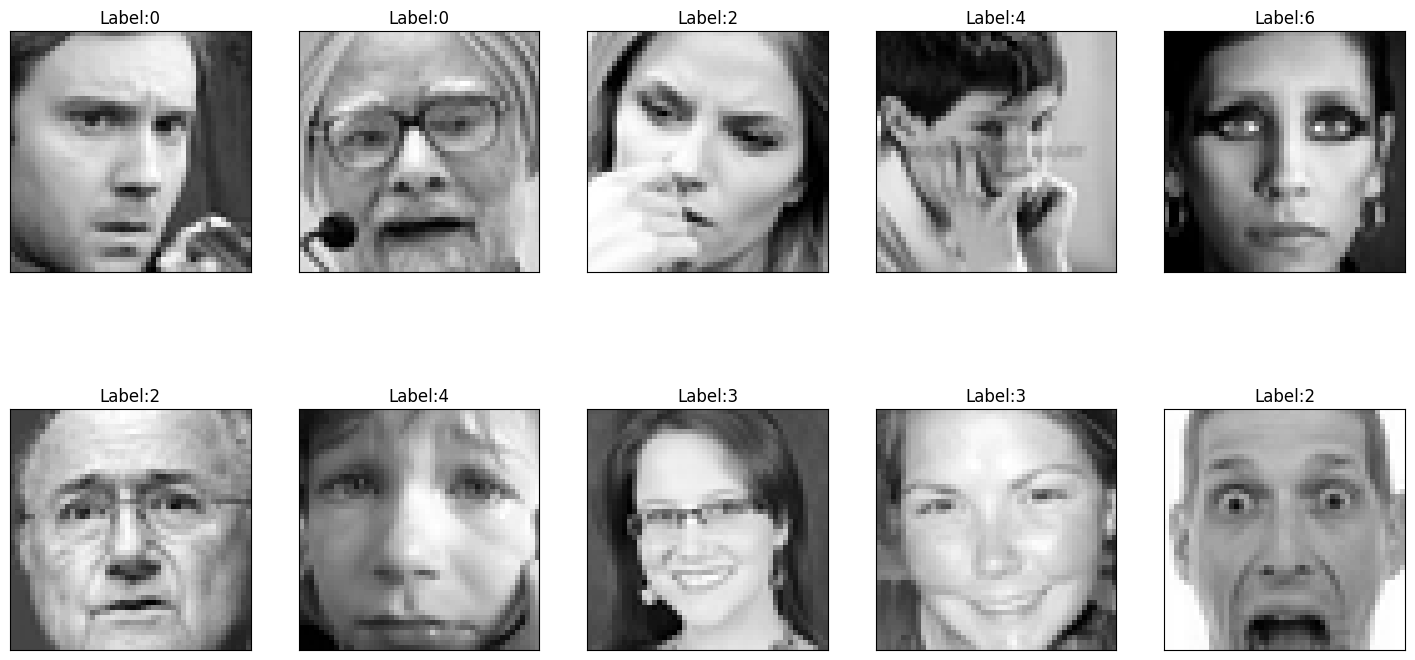

In [ ]:
## showing images here
show_img(images, labels)

### Data analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
dtypes: int64(1), object(1)
memory usage: 560.9+ KB


In [ ]:
len(df.pixels[0])

8287

In [ ]:
print(type(df.pixels[0]))

<class 'str'>


### Preprocessing

In [4]:
# Split the string into a list of numbers
df_split = df['pixels'].str.split(' ', expand=True)

# Assign column names
df_split.columns = [f'{i+1}' for i in range(df_split.shape[1])]


df_split.head()

,1,2,3,4,5,6,7,8,9,10,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [ ]:
# Check how many rows contain missing values
df_split.isnull().any(axis=1).sum()

0

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)
pca2.fit(df_split)
pca2_df = pd.DataFrame(pca2.transform(df_split))

In [ ]:
pca2_df.head()

,pca1,pca2
0,691.750859,-442.328646
1,-62.025489,561.762208
2,-1322.538070,-415.729682
3,-232.277887,656.803931
4,1796.585834,-2005.093947


In [ ]:
pca2_df.shape

(35887, 2)

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X is your data matrix
pca = PCA()
pca.fit(df_split)

# Explained variance
explained_variance = pca.explained_variance_

# Total variance
total_variance = np.sum(explained_variance)

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Cumulative explained variance ratio
cumulative_explained_variance_ratio = cumulative_explained_variance / total_variance



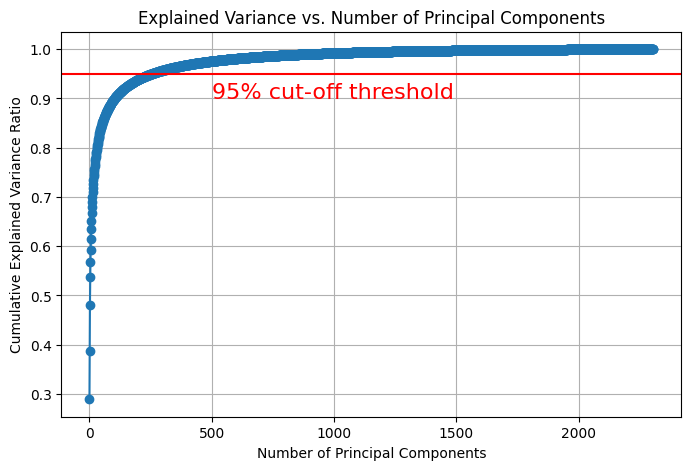

In [ ]:
# Plotting cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_explained_variance_ratio)+1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs. Number of Principal Components')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(500, 0.9, '95% cut-off threshold', color = 'red', fontsize=16)

plt.grid(True)
plt.show()

In [ ]:
# Choosing a threshold, e.g., 95%
threshold = 0.95
num_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1

print(f'Number of components explaining {threshold*100}% of the variance: {num_components}')

Number of components explaining 95.0% of the variance: 255


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=255)
pca.fit(df_split)
pca_df = pd.DataFrame(pca.transform(df_split))

In [ ]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,691.750859,-442.328649,-864.125553,389.987453,-511.411672,127.585443,106.166386,-52.826668,85.209730,152.914880,...,39.660114,-46.569844,-9.329600,3.306582,37.189829,10.082848,45.615922,13.497784,21.366321,2.285192
1,-62.025489,561.762207,565.149735,455.007830,-686.491870,91.659218,485.512104,142.392073,-86.236961,192.286571,...,18.097033,5.729552,-25.004634,34.911992,-36.159417,94.887175,-30.318075,-54.522917,39.056561,-72.383080
2,-1322.538070,-415.729686,-1930.813479,-268.862098,-810.788511,-951.422629,-1100.750593,285.101932,-318.091258,-58.438839,...,-59.024450,50.709047,19.499527,69.266704,-34.535950,-35.528450,-41.340013,1.704385,16.077751,-28.818817
3,-232.277887,656.803932,1417.060237,-1411.819979,736.970356,-27.561186,-971.055416,-661.773377,-275.999086,-251.127226,...,-33.078061,-34.445405,22.118988,26.229768,22.039052,-56.327991,-93.594622,-7.585183,2.143697,8.214590
4,1796.585834,-2005.093949,305.005651,-17.154925,-349.092367,-693.297635,-50.472897,28.735146,354.100711,570.006557,...,39.179110,-7.015820,-25.729911,55.612726,24.246120,15.032191,37.778038,91.823380,-27.201253,39.093667


### Step-by-Step Process

1. **Fit the PCA Model**:
   - Perform PCA on your dataset to transform the data into a set of principal components.

2. **Extract the Explained Variance**:
   - Once the PCA model is fitted, obtain the variance explained by each principal component. This is provided by the `pca.explained_variance_` attribute, which lists the variances in descending order for each principal component.

3. **Calculate Total Variance**:
   - Determine the total variance in the dataset. This is done by summing up all the explained variances from the principal components.

4. **Cumulative Explained Variance**:
   - Compute the cumulative sum of the explained variances. This cumulative sum indicates the total variance explained as more principal components are added.

5. **Cumulative Explained Variance Ratio**:
   - Normalize the cumulative explained variance by dividing each cumulative sum by the total variance. This provides the cumulative explained variance ratio, showing the proportion of the total variance explained by the first \( k \) components.

6. **Plotting (Optional)**:
   - Optionally, plot the cumulative explained variance ratio against the number of principal components. This plot typically shows an "elbow" where the explained variance begins to level off. This visualization aids in selecting the optimal number of components.

7. **Choose a Threshold**:
   - Decide on a threshold for the cumulative explained variance ratio. Common thresholds are 90% or 95%, meaning you aim to explain at least 90% or 95% of the total variance in the dataset.

8. **Determine the Number of Components**:
   - Identify the smallest number of principal components required to reach or exceed the chosen threshold. This is done by finding the point where the cumulative explained variance ratio first exceeds the threshold.

### Explanation of the Selection Process

The goal of this process is to find the minimum number of principal components that capture a significant portion of the total variance in the data, balancing between model simplicity and the amount of explained variance. Here’s a more detailed explanation of why each step is important:

- **Explained Variance**: Indicates how much variance each principal component captures. Components with higher explained variance capture more information from the data.
  
- **Total Variance**: Provides a reference for the total amount of variance present in the dataset, which is essential for understanding the relative contributions of each component.
  
- **Cumulative Explained Variance**: By summing the explained variances, you can see the total variance explained as you include more components, which helps in understanding the additive effect of including more components.
  
- **Cumulative Explained Variance Ratio**: Normalizing the cumulative explained variance makes it easier to decide on a threshold for the proportion of total variance you want to capture, facilitating a more straightforward decision-making process.
  
- **Plotting**: The plot helps visualize where adding more components results in diminishing returns. The "elbow" point in the plot often indicates the optimal number of components, as it shows where the rate of increase in explained variance slows down significantly.
  
- **Threshold Selection**: A threshold such as 90% or 95% ensures that you capture a substantial amount of the total variance while maintaining model simplicity by using fewer components.
  
- **Determine Number of Components**: Finding the point where the cumulative explained variance ratio meets or exceeds the threshold ensures you are selecting the minimum number of components needed to capture the desired amount of variance.

This structured approach ensures that you select a sufficient number of principal components to capture the bulk of the data's variance without overcomplicating the model with unnecessary components.

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



In [7]:
X_od = df_split
y_od = df.emotion

X_od_train, X_od_test, y_od_train, y_od_test = train_test_split(X_od, y_od, random_state=10, train_size=0.8)

In [ ]:
X_od_train.head()

,1,2,3,4,5,6,7,8,9,10,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,2304
15835,255,255,255,255,255,255,255,255,255,252,...,255,253,255,255,255,255,255,255,255,255
26921,220,102,75,79,96,93,74,64,82,78,...,71,34,25,33,40,45,72,67,25,26
22879,20,42,45,26,32,35,44,56,58,43,...,227,228,229,225,221,232,240,226,227,229
31275,43,41,38,35,35,33,32,26,24,23,...,54,92,68,28,11,17,14,16,16,14
14633,81,100,117,145,176,192,200,205,206,208,...,188,223,222,226,227,227,227,228,228,229


In [ ]:
len(X_od_train), len(X_od_test)

(28709, 7178)

In [8]:
X_td = pca_df
y_td = df.emotion

X_td_train, X_td_test, y_td_train, y_td_test = train_test_split(X_td, y_td, random_state=10, train_size=0.8)

In [ ]:
X_td_train.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
15835,2658.136259,2150.203747,1380.868284,307.260080,-33.141662,156.117408,111.289627,1117.816216,-1293.372396,90.076245,...,-92.360734,-24.672180,25.069450,94.043200,-88.392196,11.784562,30.733205,13.067839,-16.184883,-101.316455
26921,-11.825223,-1250.735718,-1058.540357,-832.216502,1083.069618,-184.250204,-170.092284,-0.461793,73.646686,-59.986175,...,-39.043563,22.427574,-15.883448,-47.792151,12.238655,-56.124268,-15.814477,-51.834696,-22.175436,52.619157
22879,-846.270746,18.781138,801.678349,-1209.616829,-792.543925,439.675327,-645.440435,173.823378,223.080042,-26.148888,...,12.482969,-34.650277,22.196053,12.298210,25.463955,-13.031019,-111.586422,-46.341032,32.026318,28.605073
31275,2913.808988,-668.576388,862.728766,-251.654416,554.185738,-782.056801,-30.221783,398.008153,133.808774,-354.528881,...,18.069097,-44.154899,47.786998,-25.557116,-18.396928,-58.899980,-73.192200,-29.144224,-100.103045,46.039837
14633,-3510.517591,-204.558848,74.733416,232.986473,102.086141,350.416210,-43.506973,225.355119,-274.877719,-148.071538,...,62.539699,48.263744,16.356672,-38.066908,-24.207111,4.791399,11.933205,-30.232998,23.067968,-10.967041


In [ ]:
len(X_td_train), len(X_td_test)

(28709, 7178)

## 3.1 SVM

* ***Original data:***

In [ ]:
pipe_line_svm_od = make_pipeline(StandardScaler(), SVC())
pipe_line_svm_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

**Tuning model:**

In [ ]:
param_grid = {"C": [0.01, 0.1, 1, 10],
              "gamma": ["scale", "auto"]}
gridsearch_svm_od = make_pipeline(StandardScaler(), GridSearchCV(SVC(), param_grid, cv=3, scoring="f1_micro", verbose=1, n_jobs=-1)) #chọn số cv là 10 và score để đánh giá là f1

gridsearch_svm_od.fit(X_od_train, y_od_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=3, estimator=SVC(),
                              param_grid={'C': [0.01, 0.1, 1, 10],
                                          'gamma': ['scale', 'auto']},
                              scoring='f1_micro', verbose=1))])

In [ ]:
#in ra param đc cho là tố nhất
gridsearch_svm_od[1].best_params_

{'C': 10, 'gamma': 'auto'}

In [ ]:
pipe_line_svm_od = make_pipeline(StandardScaler(), SVC(C=10, gamma="auto"))
pipe_line_svm_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

* ***Transformed data:***

In [ ]:
pipe_line_svm_td = make_pipeline(StandardScaler(), SVC())
pipe_line_svm_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

**Tuning model:**

In [ ]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100],
              "gamma": ["scale", "auto"]}
gridsearch_svm_td = make_pipeline(StandardScaler(), GridSearchCV(SVC(), param_grid, cv=5, scoring="f1_micro", verbose=1)) #chọn số cv là 10 và score để đánh giá là f1

gridsearch_svm_td.fit(X_td_train, y_td_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.01, 0.1, 1, 10, 100],
                                          'gamma': ['scale', 'auto']},
                              scoring='f1_micro', verbose=1))])

In [ ]:
#in ra param đc cho là tố nhất
gridsearch_svm_td[1].best_params_

{'C': 10, 'gamma': 'auto'}

In [ ]:
pipe_line_svm_td = make_pipeline(StandardScaler(), SVC(C=10, gamma="auto"))
pipe_line_svm_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma='auto'))])

# 3.2 MLP models

* ***Original data:***

In [ ]:
pipe_line_mlp_od = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", learning_rate="adaptive", batch_size=128, max_iter=200, early_stopping=True))
pipe_line_mlp_od.fit(X_od_train, y_od_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=128, learning_rate='adaptive'))])

**Tuning model:**

In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [64, 128, 256]
}
gridsearch_mlp_od = make_pipeline(StandardScaler(), GridSearchCV(MLPClassifier(max_iter=200, early_stopping=True), param_grid, cv=5, n_jobs=-1, verbose=2 ))

gridsearch_mlp_od.fit(X_od_train, y_od_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=MLPClassifier(early_stopping=True),
                              n_jobs=-1,
                              param_grid={'activation': ['relu', 'tanh'],
                                          'batch_size': [64, 128, 256],
                                          'hidden_layer_sizes': [(50,), (100,),
                                                                 (50, 50),
                                                                 (100, 50)],
                                          'learning_rate': ['constant',
                                                            'adaptive']},
                              verbose=2))])

In [ ]:
gridsearch_mlp_od[1].best_params_

{'activation': 'relu',
 'batch_size': 256,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive'}

In [ ]:
pipe_line_mlp_od = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", learning_rate="adaptive", batch_size=256, max_iter=200, early_stopping=True))
pipe_line_mlp_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=256, early_stopping=True,
                               learning_rate='adaptive'))])

* ***Transformed data:***

In [ ]:
pipe_line_mlp_td = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", learning_rate="adaptive", batch_size=128, max_iter=200, early_stopping=True))
pipe_line_mlp_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=128, early_stopping=True,
                               learning_rate='adaptive'))])

**Tuning model**


In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'batch_size': [64, 128, 256]
}
gridsearch_mlp_td = make_pipeline(StandardScaler(), GridSearchCV(MLPClassifier(max_iter=200, early_stopping=True), param_grid, cv=5, n_jobs=-1 ))

gridsearch_mlp_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=MLPClassifier(early_stopping=True),
                              n_jobs=-1,
                              param_grid={'activation': ['relu', 'tanh'],
                                          'batch_size': [64, 128, 256],
                                          'hidden_layer_sizes': [(50,), (100,),
                                                                 (50, 50),
                                                                 (100, 50)],
                                          'learning_rate': ['constant',
                                                            'adaptive']}))])

In [ ]:
gridsearch_mlp_td[1].best_params_

{'activation': 'relu',
 'batch_size': 64,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant'}

In [ ]:
pipe_line_mlp_td = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", learning_rate="constant", batch_size=64, max_iter=200, early_stopping=True))
pipe_line_mlp_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(batch_size=64, early_stopping=True))])

# 3.3 Random Forest Classifier

* ***Original data:***

In [ ]:
pipe_line_rf_od = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
pipe_line_rf_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

**Tuning model:**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 16]
}
gridsearch_rf_od = make_pipeline(StandardScaler(), GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1 ))

gridsearch_rf_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [4, 8, 16],
                                          'n_estimators': [50, 100, 200]}))])

In [ ]:
gridsearch_rf_od[1].best_params_

{'max_depth': 16, 'n_estimators': 200}

In [ ]:
pipe_line_rf_od = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200, random_state=42, max_depth=16))
pipe_line_rf_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=16, n_estimators=200,
                                        random_state=42))])

* ***Transformed data:***

In [ ]:
pipe_line_rf_td = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, random_state=42))
pipe_line_rf_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [ ]:
pipe_line_rf_td.predict(X_td_test)

array([5, 6, 3, ..., 3, 3, 5])

**Tuning model:**

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4, 8, 16]
}
gridsearch_rf_td = make_pipeline(StandardScaler(), GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1 ))

gridsearch_rf_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=42),
                              n_jobs=-1,
                              param_grid={'max_depth': [4, 8, 16],
                                          'n_estimators': [50, 100, 200]}))])

In [ ]:
gridsearch_rf_td[1].best_params_

{'max_depth': 16, 'n_estimators': 200}

In [ ]:
pipe_line_rf_td = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=200, random_state=42, max_depth=16))
pipe_line_rf_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=16, n_estimators=200,
                                        random_state=42))])

# 3.4 k-Nearest Neighbors (k-NN)

* ***Original data:***

In [ ]:
pipe_line_knn_od = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
pipe_line_knn_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

**Tuning model:**

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gridsearch_knn_od = make_pipeline(StandardScaler(), GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2 ))

gridsearch_knn_od.fit(X_od_train, y_od_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'metric': ['euclidean', 'manhattan',
                                                     'minkowski'],
                                          'n_neighbors': [3, 5, 7, 9],
                                          'weights': ['uniform', 'distance']},
                              verbose=2))])

In [ ]:
gridsearch_knn_od[1].best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
pipe_line_knn_od = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3, metric="manhattan", weights="distance"))
pipe_line_knn_od.fit(X_od_train, y_od_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

* ***Transformed data:***

In [ ]:
pipe_line_knn_td = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
pipe_line_knn_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

**Tuning model:**

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gridsearch_knn_td = make_pipeline(StandardScaler(), GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, n_jobs=-1, verbose=2 ))

gridsearch_knn_td.fit(X_td_train, y_td_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'metric': ['euclidean', 'manhattan',
                                                     'minkowski'],
                                          'n_neighbors': [3, 5, 7, 9],
                                          'weights': ['uniform', 'distance']},
                              verbose=2))])

In [ ]:
gridsearch_knn_td[1].best_params_

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

In [ ]:
pipe_line_knn_td = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3, metric="manhattan", weights="distance"))
pipe_line_knn_td.fit(X_td_train, y_td_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3,
                                      weights='distance'))])

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define emotion categories
emotion_categories = ['0', '1', '2', '3', '4', '5', '6']

def plot_confusion_matrix(cm, emotion_categories):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_categories, yticklabels=emotion_categories)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

def print_max_min_f1_scores(report):
    # Extract F1 scores from the report
    f1_scores = {label: metrics['f1-score'] for label, metrics in report.items() if isinstance(metrics, dict)}

    # Find the class with the maximum F1 score
    max_f1_class = max(f1_scores, key=f1_scores.get)
    max_f1_score = f1_scores[max_f1_class]

    # Find the class with the minimum F1 score
    min_f1_class = min(f1_scores, key=f1_scores.get)
    min_f1_score = f1_scores[min_f1_class]

    # Print the results
    print(f'Emotion with most accurate: {max_f1_class}, F1 score: {max_f1_score}')
    print(f'Emotion with most errors: {min_f1_class}, F1 score: {min_f1_score}')



# Original data:

In [ ]:
results_od = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

* **SVM**

In [ ]:
cm_svm_od = confusion_matrix(y_od_test, pipe_line_svm_od.predict(X_od_test))

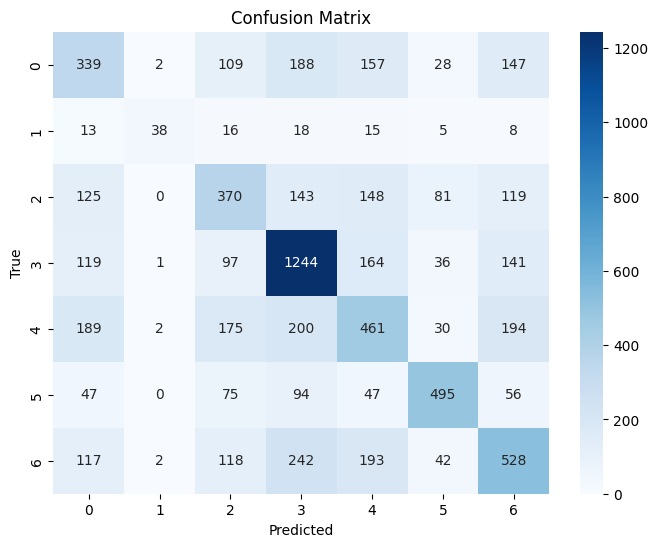

In [ ]:
plot_confusion_matrix(cm_svm_od, emotion_categories)

In [ ]:
print(classification_report(y_od_test, pipe_line_svm_od.predict(X_od_test)))

              precision    recall  f1-score   support

           0       0.36      0.35      0.35       970
           1       0.84      0.34      0.48       113
           2       0.39      0.38      0.38       986
           3       0.58      0.69      0.63      1802
           4       0.39      0.37      0.38      1251
           5       0.69      0.61      0.65       814
           6       0.44      0.43      0.43      1242

    accuracy                           0.48      7178
   macro avg       0.53      0.45      0.47      7178
weighted avg       0.48      0.48      0.48      7178



In [ ]:
cr_svm_od = classification_report(y_od_test, pipe_line_svm_od.predict(X_od_test), output_dict=True)

In [ ]:
results_od["Model"].append("SVM")
results_od["Accuracy"].append(cr_svm_od['accuracy'])
results_od["Precision"].append(cr_svm_od['macro avg']['precision'])
results_od["Recall"].append(cr_svm_od['macro avg']['recall'])
results_od["F1-Score"].append(cr_svm_od['macro avg']['f1-score'])


In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_svm_od)

Emotion with most accurate: 5, F1 score: 0.6466361854996734
Emotion with most errors: 0, F1 score: 0.35330901511203755


* **MLP model**

In [ ]:
cm_mlp_od = confusion_matrix(y_od_test, pipe_line_mlp_od.predict(X_od_test))

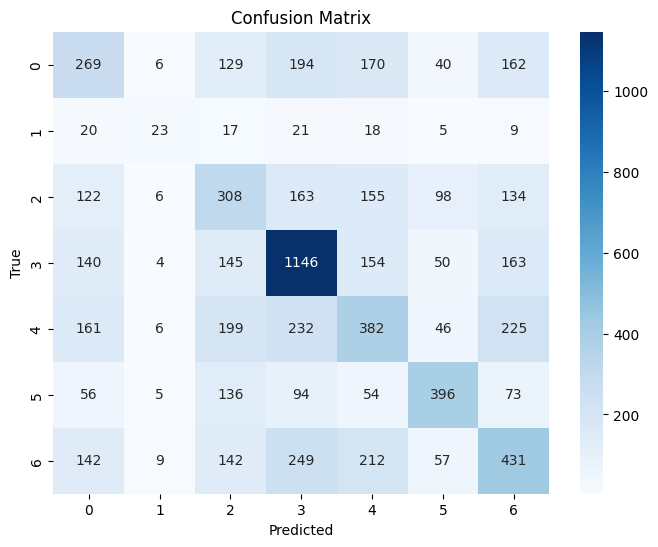

In [ ]:
plot_confusion_matrix(cm_mlp_od, emotion_categories)

In [ ]:
print(classification_report(y_od_test, pipe_line_mlp_od.predict(X_od_test)))

              precision    recall  f1-score   support

           0       0.30      0.22      0.25       970
           1       0.39      0.24      0.30       113
           2       0.31      0.31      0.31       986
           3       0.54      0.64      0.58      1802
           4       0.32      0.34      0.33      1251
           5       0.56      0.55      0.56       814
           6       0.36      0.33      0.34      1242

    accuracy                           0.41      7178
   macro avg       0.40      0.38      0.38      7178
weighted avg       0.41      0.41      0.41      7178



In [ ]:
cr_mlp_od = classification_report(y_od_test, pipe_line_mlp_od.predict(X_od_test), output_dict=True)

In [ ]:
results_od["Model"].append("MLP")
results_od["Accuracy"].append(cr_mlp_od['accuracy'])
results_od["Precision"].append(cr_mlp_od['macro avg']['precision'])
results_od["Recall"].append(cr_mlp_od['macro avg']['recall'])
results_od["F1-Score"].append(cr_mlp_od['macro avg']['f1-score'])


In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_mlp_od)

Emotion with most accurate: 3, F1 score: 0.5875416559856448
Emotion with most errors: 1, F1 score: 0.26744186046511625


* **Random Forest Classifier**

In [ ]:
cm_rf_od = confusion_matrix(y_od_test, pipe_line_rf_od.predict(X_od_test))

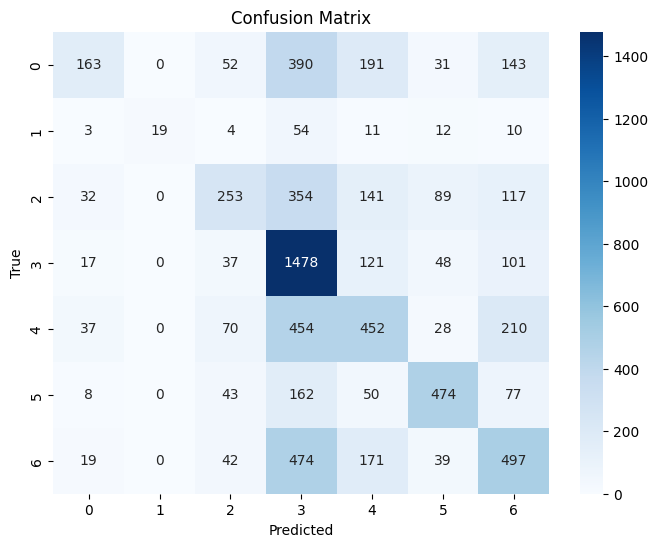

In [ ]:
plot_confusion_matrix(cm_rf_od, emotion_categories)

In [ ]:
print(classification_report(y_od_test, pipe_line_rf_od.predict(X_od_test)))

              precision    recall  f1-score   support

           0       0.58      0.17      0.26       970
           1       1.00      0.17      0.29       113
           2       0.50      0.26      0.34       986
           3       0.44      0.82      0.57      1802
           4       0.40      0.36      0.38      1251
           5       0.66      0.58      0.62       814
           6       0.43      0.40      0.41      1242

    accuracy                           0.46      7178
   macro avg       0.57      0.39      0.41      7178
weighted avg       0.49      0.46      0.44      7178



In [ ]:
cr_rf_od = classification_report(y_od_test, pipe_line_rf_od.predict(X_od_test), output_dict=True)

In [ ]:
results_od["Model"].append("RF")
results_od["Accuracy"].append(cr_rf_od['accuracy'])
results_od["Precision"].append(cr_rf_od['macro avg']['precision'])
results_od["Recall"].append(cr_rf_od['macro avg']['recall'])
results_od["F1-Score"].append(cr_rf_od['macro avg']['f1-score'])

In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_rf_od)

Emotion with most accurate: 5, F1 score: 0.6175895765472312
Emotion with most errors: 0, F1 score: 0.2610088070456365


* **k-Nearest Neighbors (k-NN)**

In [ ]:
cm_knn_od = confusion_matrix(y_od_test, pipe_line_knn_od.predict(X_od_test))

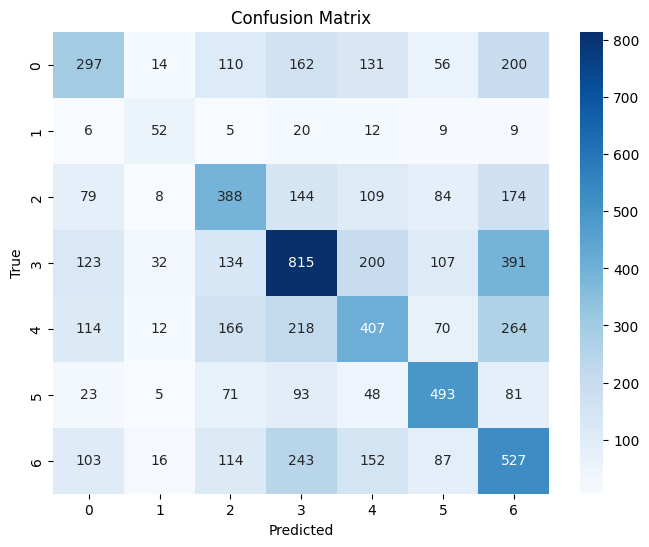

In [ ]:
plot_confusion_matrix(cm_knn_od, emotion_categories)

In [ ]:
print(classification_report(y_od_test, pipe_line_knn_od.predict(X_od_test)))

              precision    recall  f1-score   support

           0       0.40      0.31      0.35       970
           1       0.37      0.46      0.41       113
           2       0.39      0.39      0.39       986
           3       0.48      0.45      0.47      1802
           4       0.38      0.33      0.35      1251
           5       0.54      0.61      0.57       814
           6       0.32      0.42      0.36      1242

    accuracy                           0.42      7178
   macro avg       0.41      0.42      0.42      7178
weighted avg       0.42      0.42      0.41      7178



In [ ]:
cr_knn_od = classification_report(y_od_test, pipe_line_knn_od.predict(X_od_test), output_dict=True)

In [ ]:
results_od["Model"].append('k-NN')
results_od["Accuracy"].append(cr_knn_od['accuracy'])
results_od["Precision"].append(cr_knn_od['macro avg']['precision'])
results_od["Recall"].append(cr_knn_od['macro avg']['recall'])
results_od["F1-Score"].append(cr_knn_od['macro avg']['f1-score'])


In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_knn_od)

Emotion with most accurate: 5, F1 score: 0.5732558139534883
Emotion with most errors: 0, F1 score: 0.34635568513119536


**Conclusion**

In [ ]:
results_od_df = pd.DataFrame(results_od)

In [ ]:
print(results_od_df)

  Model  Accuracy  Precision    Recall  F1-Score
0   SVM  0.484118   0.527626  0.450443  0.472330
1   MLP  0.414739   0.396399  0.375192  0.381535
2    RF  0.464753   0.573368  0.393822  0.410284
3  k-NN  0.415018   0.413563  0.423922  0.415553


### Analysis:

1. **Support Vector Machine (SVM)**:
   - SVM has the highest accuracy and a relatively balanced precision and recall, leading to a decent F1-Score.

2. **Multi-Layer Perceptron (MLP)**:
   - MLP has the lowest accuracy and F1-Score, indicating it may not be performing well compared to the other models.

3. **Random Forest (RF)**:
   - RF shows the highest precision but has a lower recall, resulting in a moderate F1-Score.

4. **k-Nearest Neighbors (k-NN)**:
   - k-NN has a balanced precision and recall, but its accuracy is on the lower end.

### Summary:
- **SVM** is the best performer in terms of accuracy and has a good balance of precision and recall, resulting in the highest F1-Score among the models.
- **RF** has the highest precision but suffers from lower recall.
- **k-NN** shows balanced precision and recall but with lower overall accuracy and F1-Score.
- **MLP** is the weakest performer in this comparison.

Given these insights, SVM appears to be the most promising model overall, though specific use cases might still benefit from the strengths of other models, such as RF's high precision.

# Transformed data:

In [ ]:
results_td = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

* **SVM**

In [ ]:
cm_svm_td = confusion_matrix(y_td_test, pipe_line_svm_td.predict(X_td_test))

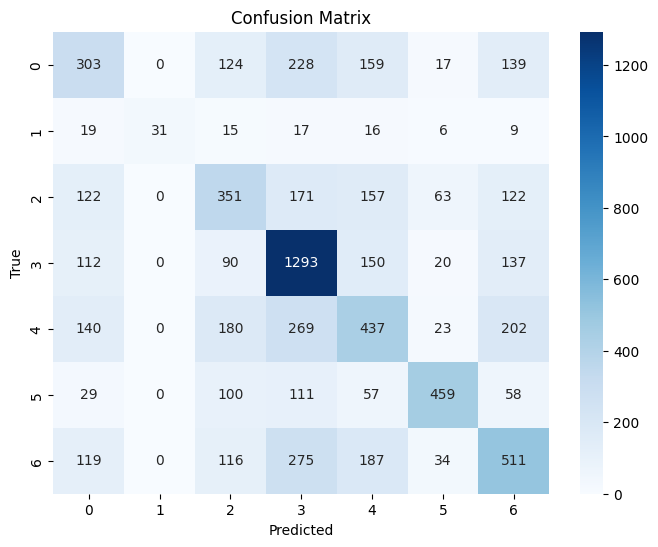

In [ ]:
plot_confusion_matrix(cm_svm_td, emotion_categories)

In [ ]:
print(classification_report(y_td_test, pipe_line_svm_td.predict(X_td_test)))

              precision    recall  f1-score   support

           0       0.35      0.31      0.33       970
           1       0.97      0.29      0.45       113
           2       0.37      0.35      0.36       986
           3       0.54      0.72      0.62      1802
           4       0.38      0.36      0.37      1251
           5       0.71      0.57      0.63       814
           6       0.44      0.41      0.43      1242

    accuracy                           0.47      7178
   macro avg       0.54      0.43      0.46      7178
weighted avg       0.47      0.47      0.47      7178



In [ ]:
cr_svm_td = classification_report(y_td_test, pipe_line_svm_td.predict(X_td_test), output_dict=True)

In [ ]:
results_td["Model"].append("SVM")
results_td["Accuracy"].append(cr_svm_td['accuracy'])
results_td["Precision"].append(cr_svm_td['macro avg']['precision'])
results_td["Recall"].append(cr_svm_td['macro avg']['recall'])
results_td["F1-Score"].append(cr_svm_td['macro avg']['f1-score'])


In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_svm_td)

Emotion with most accurate: 5, F1 score: 0.639275766016713
Emotion with most errors: 0, F1 score: 0.3340683572216097


* **MLP model**

In [ ]:
cm_mlp_td = confusion_matrix(y_td_test, pipe_line_mlp_td.predict(X_td_test))

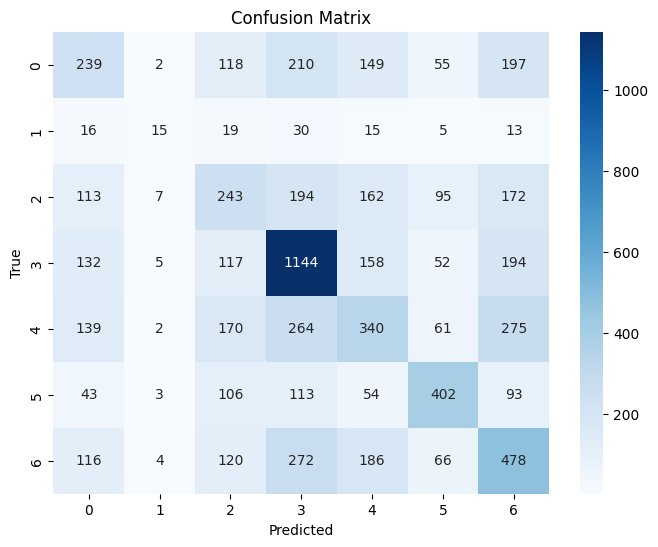

In [ ]:
plot_confusion_matrix(cm_mlp_td, emotion_categories)

In [ ]:
print(classification_report(y_td_test, pipe_line_mlp_td.predict(X_td_test)))

              precision    recall  f1-score   support

           0       0.29      0.25      0.27       970
           1       0.39      0.18      0.24       113
           2       0.29      0.25      0.26       986
           3       0.53      0.62      0.57      1802
           4       0.32      0.33      0.32      1251
           5       0.51      0.53      0.52       814
           6       0.35      0.34      0.35      1242

    accuracy                           0.40      7178
   macro avg       0.38      0.36      0.36      7178
weighted avg       0.39      0.40      0.40      7178



In [ ]:
cr_mlp_td = classification_report(y_td_test, pipe_line_mlp_td.predict(X_td_test), output_dict=True)

In [ ]:
results_td["Model"].append("MLP")
results_td["Accuracy"].append(cr_mlp_td['accuracy'])
results_td["Precision"].append(cr_mlp_td['macro avg']['precision'])
results_td["Recall"].append(cr_mlp_td['macro avg']['recall'])
results_td["F1-Score"].append(cr_mlp_td['macro avg']['f1-score'])

In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_mlp_td)

Emotion with most accurate: 3, F1 score: 0.5678828493422685
Emotion with most errors: 1, F1 score: 0.19867549668874174


* **Random Forest Classifier**

In [ ]:
cm_rf_td = confusion_matrix(y_td_test, pipe_line_rf_td.predict(X_td_test))

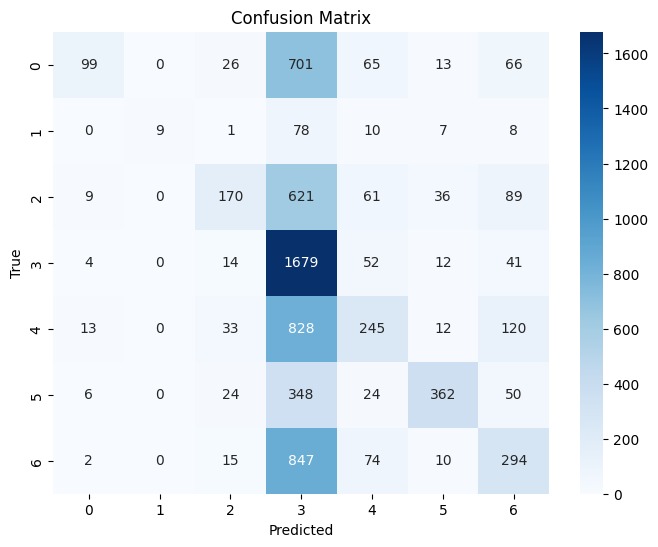

In [ ]:
plot_confusion_matrix(cm_rf_td, emotion_categories)

In [ ]:
print(classification_report(y_td_test, pipe_line_rf_td.predict(X_td_test)))

              precision    recall  f1-score   support

           0       0.72      0.10      0.18       970
           1       1.00      0.10      0.18       113
           2       0.59      0.17      0.27       986
           3       0.33      0.93      0.49      1802
           4       0.46      0.19      0.27      1251
           5       0.79      0.45      0.58       814
           6       0.44      0.25      0.32      1242

    accuracy                           0.40      7178
   macro avg       0.62      0.31      0.33      7178
weighted avg       0.52      0.40      0.35      7178



In [ ]:
cr_rf_td = classification_report(y_td_test, pipe_line_rf_td.predict(X_td_test), output_dict=True)

In [ ]:
results_td["Model"].append("RF")
results_td["Accuracy"].append(cr_rf_td['accuracy'])
results_td["Precision"].append(cr_rf_td['macro avg']['precision'])
results_td["Recall"].append(cr_rf_td['macro avg']['recall'])
results_td["F1-Score"].append(cr_rf_td['macro avg']['f1-score'])

In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_rf_td)

Emotion with most accurate: 5, F1 score: 0.5718799368088467
Emotion with most errors: 1, F1 score: 0.1475409836065574


* **k-Nearest Neighbors (k-NN)**

In [ ]:
cm_knn_td = confusion_matrix(y_td_test, pipe_line_knn_td.predict(X_td_test))

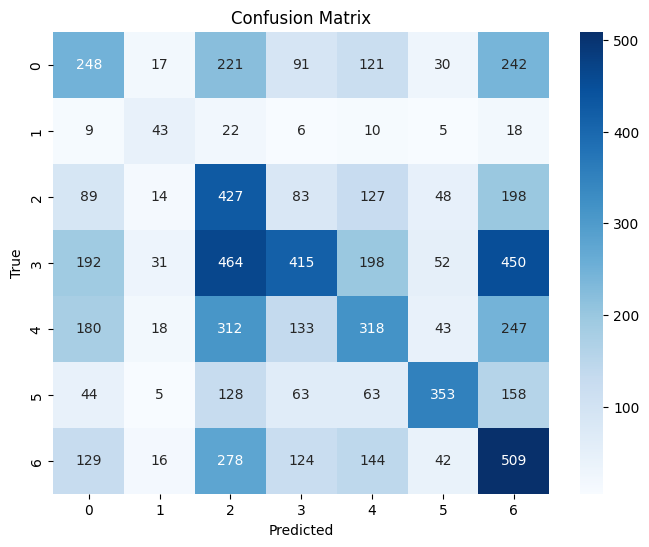

In [ ]:
plot_confusion_matrix(cm_knn_td, emotion_categories)

In [ ]:
print(classification_report(y_td_test, pipe_line_knn_td.predict(X_td_test)))

              precision    recall  f1-score   support

           0       0.28      0.25      0.27       970
           1       0.34      0.43      0.38       113
           2       0.23      0.44      0.30       986
           3       0.48      0.24      0.32      1802
           4       0.32      0.25      0.28      1251
           5       0.61      0.45      0.52       814
           6       0.28      0.40      0.33      1242

    accuracy                           0.33      7178
   macro avg       0.36      0.35      0.34      7178
weighted avg       0.37      0.33      0.33      7178



In [ ]:
cr_knn_td = classification_report(y_td_test, pipe_line_knn_td.predict(X_td_test), output_dict=True)

In [ ]:
results_td["Model"].append('k-NN')
results_td["Accuracy"].append(cr_knn_td['accuracy'])
results_td["Precision"].append(cr_knn_td['macro avg']['precision'])
results_td["Recall"].append(cr_knn_td['macro avg']['recall'])
results_td["F1-Score"].append(cr_knn_td['macro avg']['f1-score'])

In [ ]:
#Identify the emotion category where the model makes the most accurate and most errors.
print_max_min_f1_scores(cr_knn_td)

Emotion with most accurate: 5, F1 score: 0.5090122566690699
Emotion with most errors: 0, F1 score: 0.26652337452982267


## **Conclusion**

In [ ]:
results_td_df = pd.DataFrame(results_td)

In [ ]:
print(results_td_df)

  Model  Accuracy  Precision    Recall  F1-Score
0   SVM  0.472834   0.539079  0.429740  0.455127
1   MLP  0.402340   0.382689  0.355732  0.362423
2    RF  0.401087   0.619176  0.314129  0.325624
3  k-NN  0.327250   0.362257  0.353665  0.343099


### Analysis

1. **Accuracy**:
   - The SVM model has the highest accuracy (0.4728), followed by MLP (0.4023), RF (0.4011), and k-NN (0.3273).
   
2. **Precision**:
   - RF has the highest precision (0.6192), indicating it makes fewer false positive errors compared to other models. SVM follows with a precision of 0.5391.

3. **Recall**:
   - SVM has the highest recall (0.4297), suggesting it captures more true positives compared to other models.

4. **F1-Score**:
   - SVM also has the highest F1-Score (0.4551), which balances both precision and recall, making it the most balanced model among the four.

### Summary
- **Best Overall Performance**: The SVM model appears to be the best performing overall due to its highest accuracy and F1-Score.
- **Highest Precision**: The RF model has the highest precision but lower recall and F1-Score, indicating it might be suitable for scenarios where minimizing false positives is crucial.
- **Balanced Performance**: MLP and k-NN have lower metrics across the board compared to SVM and RF, suggesting they might not be as suitable for this particular problem.

In conclusion, the SVM model is recommended for its balanced and relatively high performance across different metrics.